<a href="https://colab.research.google.com/github/Itaru2018/Breast_cancer_project/blob/main/Bereat_cancer_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os

# Check if running in Google Colab
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

    # Set working directory if in Colab
    notebook_path = '/content/drive/MyDrive/Avantikav/ItaruDataScience/Feature_selection_breast_cancer/Breast_cancer_project'
    os.chdir(notebook_path)
    print("Working directory set to:", os.getcwd())
else:
    print("Running in a local environment. Set your working directory manually.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Working directory set to: /content/drive/.shortcut-targets-by-id/1_AFITQOyVCC7PLGPvH78J9M8epCGK-uX/ItaruDataScience/Feature_selection_breast_cancer/Breast_cancer_project


In [ ]:
# Import pandas
import pandas as pd

In [ ]:
import os
print(os.getcwd())

/content/drive/.shortcut-targets-by-id/1_AFITQOyVCC7PLGPvH78J9M8epCGK-uX/ItaruDataScience/Feature_selection_breast_cancer/Breast_cancer_project


In [ ]:
# Import the dataset
df = pd.read_csv('wdbc.data')

In [ ]:
# Check the head of the data
df.head()


,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
# Check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

In [ ]:
# Without the label, it's hard to see what is happeing in this dataset. So I'm goint to import the label of the dataset
# It doesn't seem the label file is csv file. So firts, load it as a plain file.
with open('wdbc.names', 'r') as file:
    plaindata = file.read()
print(plaindata)

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

In [ ]:
# Create the feature names according to the description
# Define the base feature name
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal dimension']

# Check the size of the list so that I don't miss any features
len(features)

10

In [ ]:
# Define the full feature names
feature_names = ['ID', 'Diagnostic'] + [f'{feature}_mean' for feature in features] + [f'{feature}_SE' for feature in features] + [f'{feature}_worst' for feature in features]

# Check the size of the feature
len(feature_names)


32

In [ ]:
# The dataset dosen't have the column name with the feature_names I've created.
df = pd.read_csv('wdbc.data', header=None, names=feature_names)

In [ ]:
# Check the head of the dataset
df.head()

,ID,Diagnostic,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnostic               569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal dimension_mean   569 non-null    float64
 12  radius_SE                569 non-null    float64
 13  texture_SE               569 non-null    float64
 14  perimeter_SE             5

In [ ]:
# Convert 'Diagonostic' column to binary
df['Diagnostic_num'] = df['Diagnostic'].map({'M':1, 'B':0})

# Check the head of df
df.head()

,ID,Diagnostic,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal dimension_worst,Diagnostic_num
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
# Count the value of the num_column to verfy whether the conversion worked well or not

df['Diagnostic_num'].value_counts()

,count
Diagnostic_num,
0,357
1,212


In [ ]:
# ID isn't important. So drop it
df.drop('ID', axis=1, inplace =True)

In [ ]:
# Check the dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnostic               569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal dimension_mean   569 non-null    float64
 11  radius_SE                569 non-null    float64
 12  texture_SE               569 non-null    float64
 13  perimeter_SE             569 non-null    float64
 14  area_SE                  5

In [ ]:
#Judging form the website and .info, the dataset seems to be clean. So I'm going to split the data.

In [ ]:
# Split the dataset into features and target
X = df.drop(['Diagnostic_num', 'Diagnostic'], axis=1)

y = df['Diagnostic_num']

In [ ]:
# Check X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave_points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal dimension_mean   569 non-null    float64
 10  radius_SE                569 non-null    float64
 11  texture_SE               569 non-null    float64
 12  perimeter_SE             569 non-null    float64
 13  area_SE                  569 non-null    float64
 14  smoothness_SE            5

In [ ]:
# Check y
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: Diagnostic_num
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [ ]:
#Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_t, X_val, y_train_t, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
# Apply to PCA to reduce 2 principle componets
# Import necessary packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the scaler
scaler = StandardScaler()

#Fit the scaler on the training data
X_train_t_scaled = scaler.fit_transform(X_train_t)

#Check whether the data is normalized
print(f'mean is {np.mean(X_train_t_scaled)}')
print(f'std is {np.std(X_train_t_scaled)}')

mean is 2.4237835995479608e-17
std is 1.0


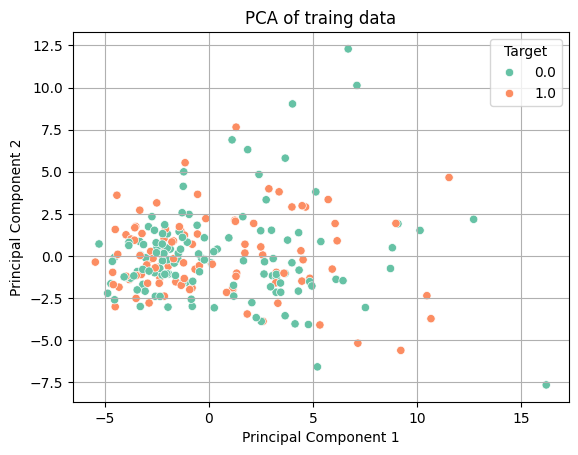

In [ ]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA
X_train_t_pca = pca.fit_transform(X_train_t_scaled)

# Make a DataFrame to plot the graph
pca_df = pd.DataFrame(X_train_t_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y_train_t

# Create a plot
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=pca_df, palette='Set2')

# Add level
plt.title('PCA of traing data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.grid(True)
plt.show()

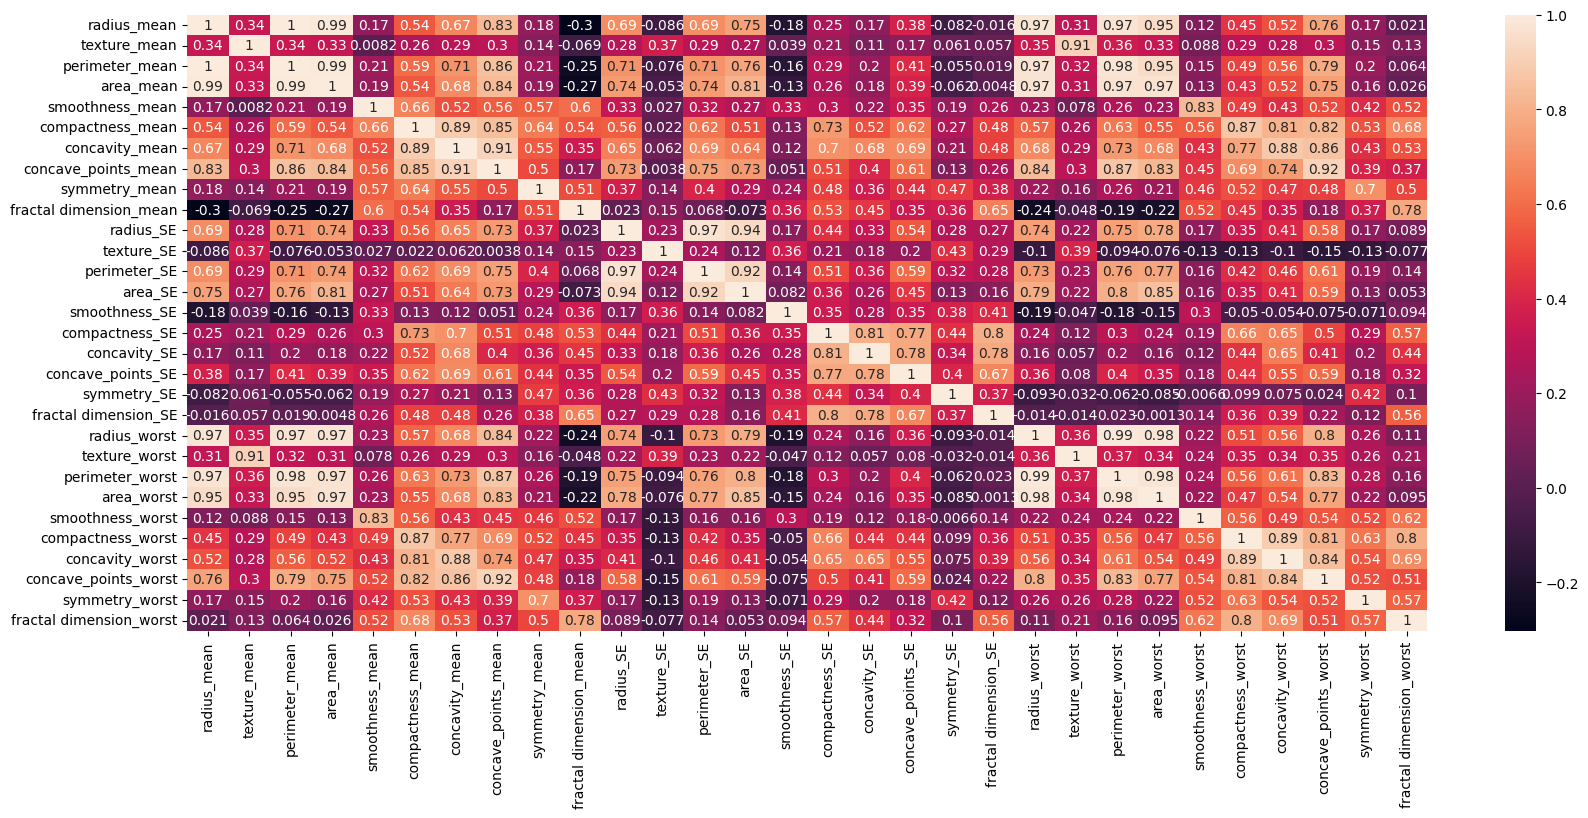

In [ ]:
# Calculate the Person's correlation
corrmat = X_train_t.corr(method='pearson')
# visualize correlation heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.heatmap(corrmat, annot=True )
plt.show()

In [ ]:
# Import libraries
!pip install feature-engine
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.ensemble import RandomForestClassifier

# Pick the best features amoug correlated features using random forest
sel_c_r = SmartCorrelatedSelection(
    method='pearson',
    threshold=0.7,
    selection_method='model_performance',
estimator=RandomForestClassifier(n_estimators=5, random_state=10),   #   I don't know how to tune hyper parameters.
    scoring='f1',                                                    #   My book used ROC, but I use f1
    cv=3)
sel_c_r.fit(X_train_t, y_train_t)
X_train_t_c_r = sel_c_r.transform(X_train_t)
X_val_c_r = sel_c_r.transform(X_val)
X_test_c_r = sel_c_r.transform(X_test)

In [ ]:
X_train_t_c_r.head()

,concavity_mean,symmetry_mean,fractal dimension_mean,texture_SE,smoothness_SE,symmetry_SE,radius_worst,texture_worst,smoothness_worst,concave_points_worst
79,0.03889,0.1718,0.05997,1.0950,0.005293,0.01748,14.24,24.82,0.1289,0.07926
504,0.09730,0.2378,0.09502,1.0930,0.009783,0.02542,10.28,16.38,0.1902,0.10250
131,0.14660,0.1931,0.05796,0.7859,0.006240,0.01397,19.26,26.00,0.1546,0.15140
127,0.09271,0.1946,0.05044,1.3420,0.004428,0.02030,22.32,25.73,0.1021,0.12180
137,0.03503,0.1734,0.05865,0.9938,0.005133,0.01501,12.32,22.02,0.1190,0.08476


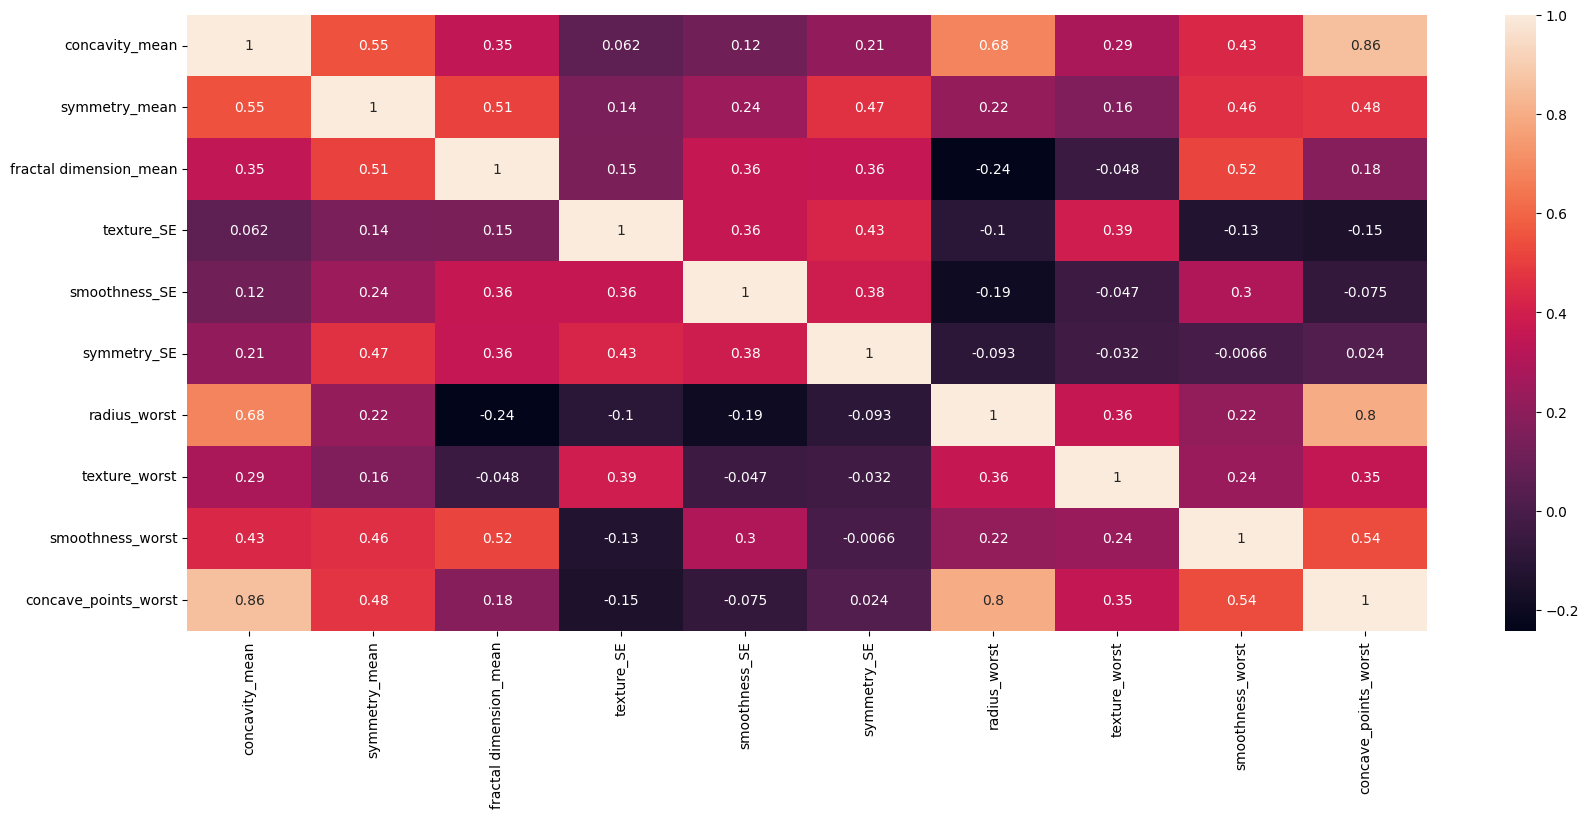

In [ ]:
# Calculate the Person's correlation
corrmat = X_train_t_c_r.corr(method='pearson')
# visualize correlation heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.heatmap(corrmat, annot=True )
plt.show()

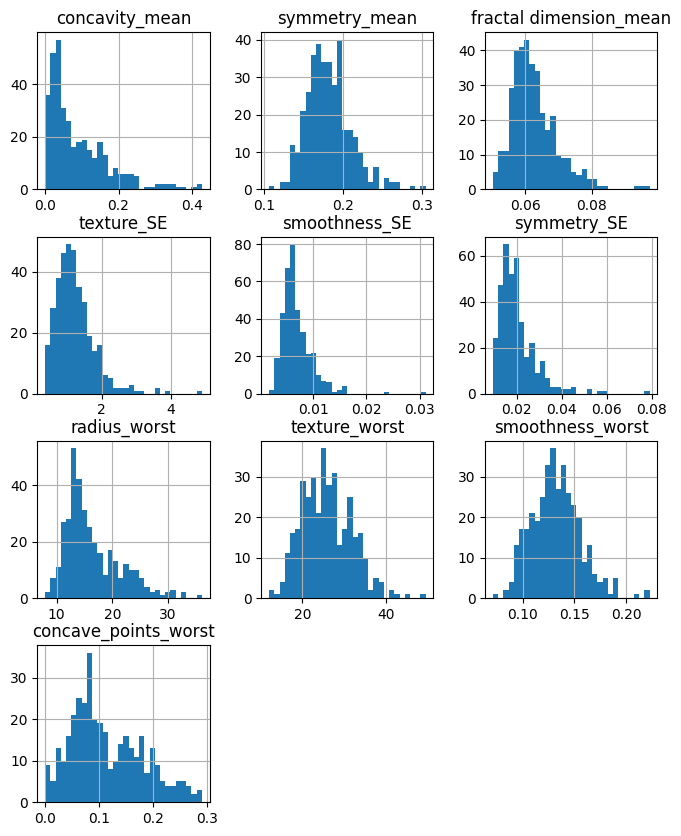

In [ ]:
X_train_t_c_r.hist(bins=30, figsize=(8,10))
plt.show()

Recursive feauture addition

In [ ]:
#Use RandomForest
from feature_engine.selection import RecursiveFeatureAddition
model = RandomForestClassifier(n_estimators=5, random_state=10)

rfa = RecursiveFeatureAddition(
    estimator=model,
    scoring='f1',
    threshold=0.001,
    cv=3
)

#Fit it to the train set
rfa.fit(X_train_t, y_train_t)

RecursiveFeatureAddition(estimator=RandomForestClassifier(n_estimators=5,
                                                          random_state=10),
                         scoring='f1', threshold=0.001)

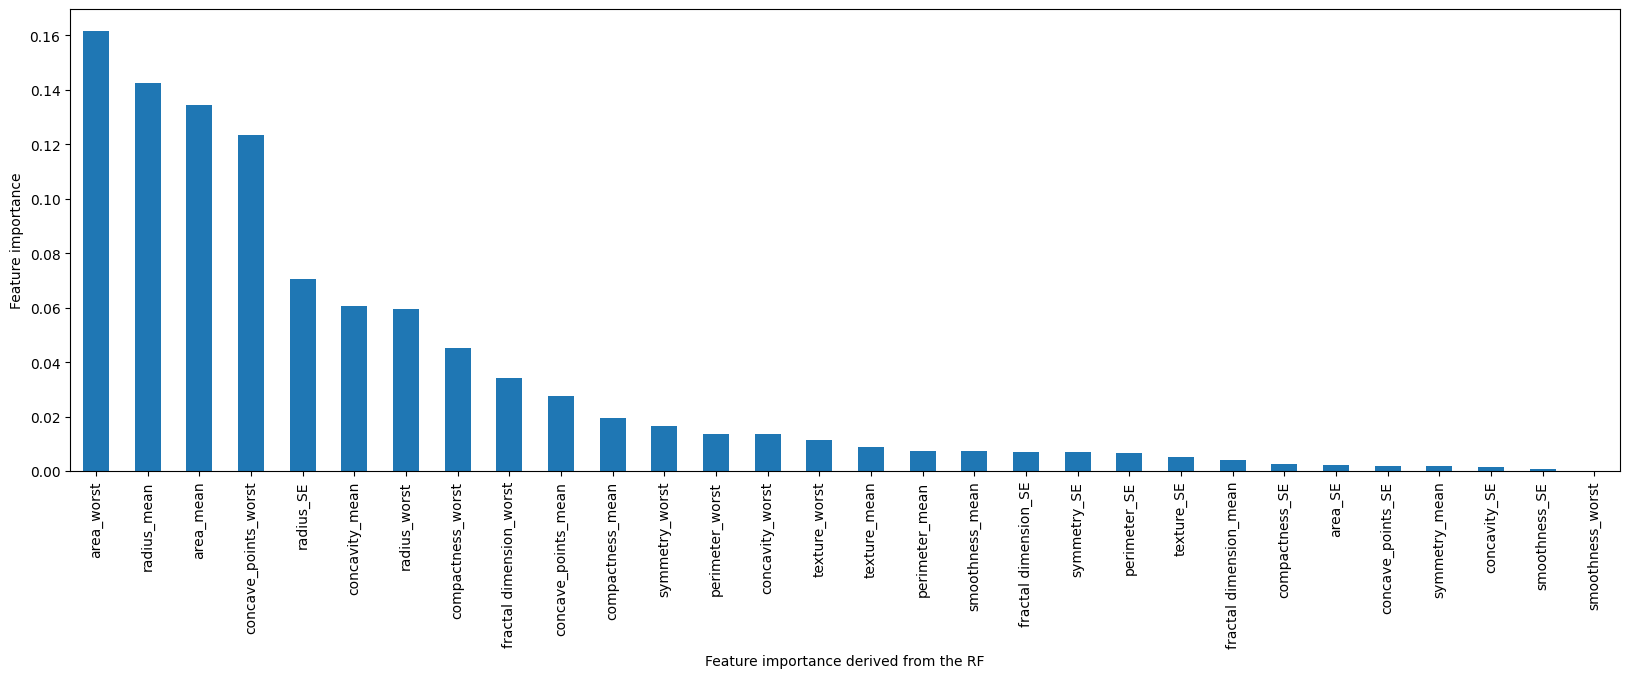

In [ ]:
rfa.feature_importances_.plot.bar(figsize=(20, 6))
plt.ylabel('Feature importance')
plt.xlabel('Feature importance derived from the RF')
plt.show()

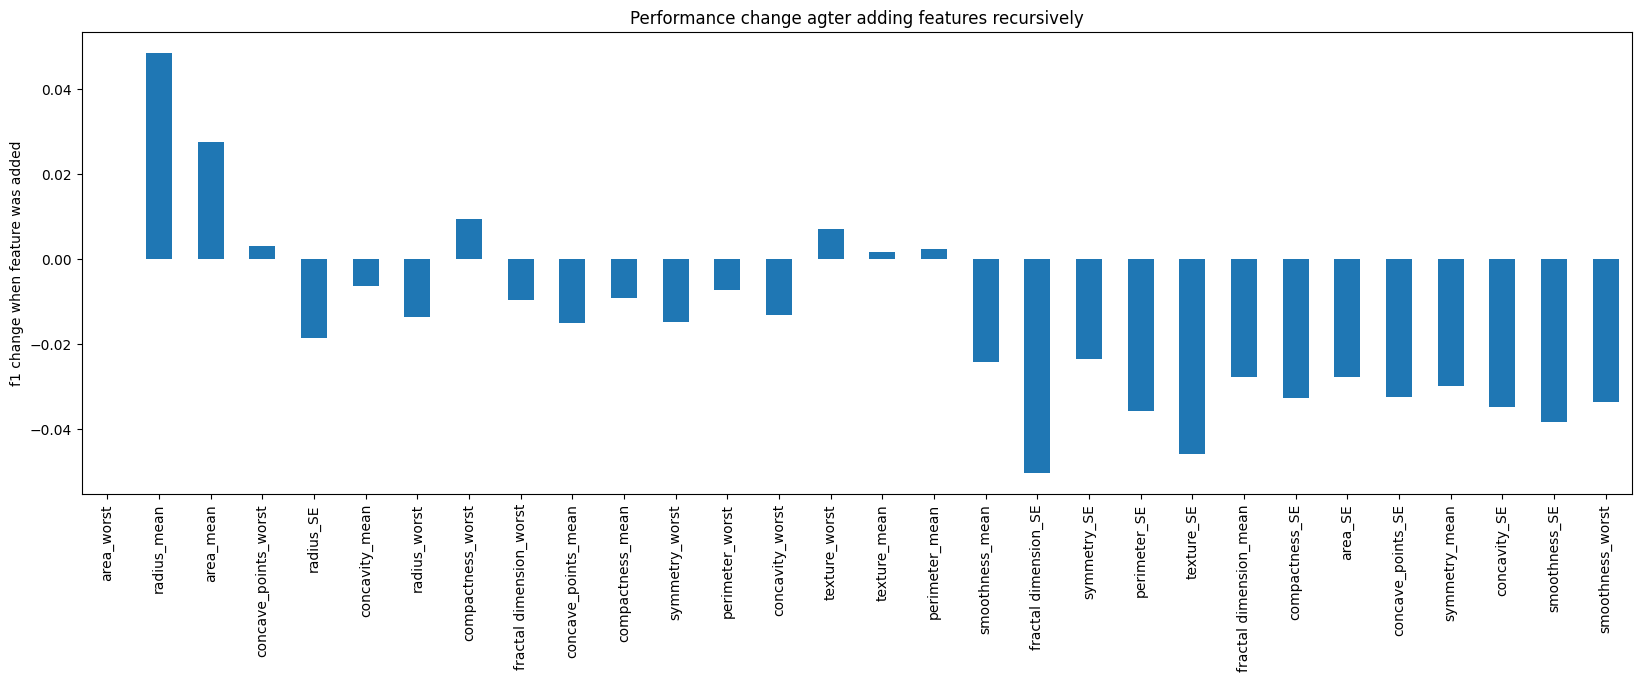

In [ ]:
pd.Series(rfa.performance_drifts_).plot.bar(figsize=(20,6))
plt.title('Performance change after adding features recursively')
plt.ylabel('f1 change when feature was added')
plt.show()

In [ ]:
# Print dropped features
rfa.features_to_drop_

['smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal dimension_mean',
 'radius_SE',
 'texture_SE',
 'perimeter_SE',
 'area_SE',
 'smoothness_SE',
 'compactness_SE',
 'concavity_SE',
 'concave_points_SE',
 'symmetry_SE',
 'fractal dimension_SE',
 'radius_worst',
 'perimeter_worst',
 'smoothness_worst',
 'concavity_worst',
 'symmetry_worst',
 'fractal dimension_worst']

In [ ]:
# Count the number of features
len(rfa.features_to_drop_)

22

In [ ]:
X_train_t_rfa = rfa.transform(X_train_t)
X_val_rfa = rfa.transform(X_val)
X_test_rfa = rfa.transform(X_test)

X_train_t_rfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 79 to 493
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   radius_mean           364 non-null    float64
 1   texture_mean          364 non-null    float64
 2   perimeter_mean        364 non-null    float64
 3   area_mean             364 non-null    float64
 4   texture_worst         364 non-null    float64
 5   area_worst            364 non-null    float64
 6   compactness_worst     364 non-null    float64
 7   concave_points_worst  364 non-null    float64
dtypes: float64(8)
memory usage: 25.6 KB


I don't udnerstand the logic befind rfa.
1. What is the feature importance
2. What is the performance change
3. Whay are they 7 features instead of 2 features?

Let's evalute performance for all selceted features

In [135]:
# Scale original feature sets
X_train_scaled = scaler.fit_transform(X_train_t)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Commit PCA (variance 95%)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [136]:
# Function to evaluate model performance
from sklearn.metrics import f1_score
def evaluate_model(model, X_train, y_train, X_val, y_val):
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_val_pred   = model.predict(X_val)
  train_score = f1_score(y_train, y_train_pred)
  val_score = model.score(y_val, y_val_pred)
  return train_score, val_score

In [145]:
# Random Forest and Logistic Regression on different features sets
from sklearn.linear_model import LogisticRegression
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)}
# List of feature sets (RFA, PCA, ANOVA)
feature_sets ={
      'PCA': (X_train_pca, X_val_pca),
      'Correlation and RF': (X_train_t_c_r, X_val_c_r),
      'RFA': (X_train_t_rfa, X_val_rfa),
  }

# List to store results
results = []

# Iterate over each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}")

    # Iterate over each feature set
    for feature_set_name, (X_train_set, X_val_set) in feature_sets.items():
        # Evaluate the model on the current feature set
        train_f1, val_f1 = evaluate_model(model, X_train_set, y_train_t, X_val_set, y_val)

        # Store results in a list for easy viewing
        results.append({
            'Model': model_name,
            'Feature Set': feature_set_name,
            'Train F1 Score': train_f1,
            'Validation F1 Score': val_f1
        })

# Convert the results to a DataFrame for easier inspection
results_df = pd.DataFrame(results)
print(results_df)


Evaluating RandomForest
Evaluating LogisticRegression
                Model         Feature Set  Train F1 Score  Validation F1 Score
0        RandomForest                 PCA        1.000000             0.967033
1        RandomForest  Correlation and RF        1.000000             0.967033
2        RandomForest                 RFA        1.000000             0.945055
3  LogisticRegression                 PCA        0.986264             0.978022
4  LogisticRegression  Correlation and RF        0.945055             0.945055
5  LogisticRegression                 RFA        0.964286             0.956044


In [147]:
# Print it with all the feature version
# Random Forest and Logistic Regression on different features sets
from sklearn.linear_model import LogisticRegression
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)}
# List of feature sets (RFA, PCA, ANOVA)
feature_sets ={
      'PCA': (X_train_pca, X_val_pca),
      'Correlation and RF': (X_train_t_c_r, X_val_c_r),
      'RFA': (X_train_t_rfa, X_val_rfa),
      'All_scaled': (X_train_scaled, X_val_scaled)
  }

# List to store results
results = []

# Iterate over each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}")

    # Iterate over each feature set
    for feature_set_name, (X_train_set, X_val_set) in feature_sets.items():
        # Evaluate the model on the current feature set
        train_f1, val_f1 = evaluate_model(model, X_train_set, y_train_t, X_val_set, y_val)

        # Store results in a list for easy viewing
        results.append({
            'Model': model_name,
            'Feature Set': feature_set_name,
            'Train F1 Score': train_f1,
            'Validation F1 Score': val_f1
        })

# Convert the results to a DataFrame for easier inspection
results_df = pd.DataFrame(results)
print(results_df)


Evaluating RandomForest
Evaluating LogisticRegression
                Model         Feature Set  Train F1 Score  Validation F1 Score
0        RandomForest                 PCA        1.000000             0.967033
1        RandomForest  Correlation and RF        1.000000             0.967033
2        RandomForest                 RFA        1.000000             0.945055
3        RandomForest          All_scaled        1.000000             0.967033
4  LogisticRegression                 PCA        0.986264             0.978022
5  LogisticRegression  Correlation and RF        0.945055             0.945055
6  LogisticRegression                 RFA        0.964286             0.956044
7  LogisticRegression          All_scaled        0.989011             0.967033


1. There are not so much impact.
2. Except for PCA, it's not as good as using all the features. Maybe I should have scaled CRF and RFA as well.